ASSIGNMENT 1 PART 2 \
TASK 1
-

Importations and Definition of Functions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn import preprocessing
import os

data_path="drive/My Drive/Colab Notebooks"
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_rows', None)

In [3]:
# Run only once; uncomment to run
# Converting txt to csv
#data = pd.read_csv(f"{data_path}/MQClass/Assign-1/data/landsat/landsat.csv")
read_file = pd.read_csv(f"{data_path}/MQClass/Assign-2/CODE/server-log.txt",delimiter = ' ')
read_file.to_csv('server-log.csv', index=None)

In [4]:
data=pd.read_csv('server-log.csv')

print(type(data))
print("data size: "+str(data.shape))
data.head()

<class 'pandas.core.frame.DataFrame'>
data size: (46250, 9)


,No,Start-Date,Start-Time,Duration,Service,Source-Port,Distination-Port,Source-IP,Distination-IP
0,1,06/04/2014,00:00:00,00:00:01,ntp/u,123,123,172.016.112.020,192.168.001.010
1,2,06/04/2014,00:00:14,00:00:01,http,8246,80,172.016.113.105,207.077.090.015
2,3,06/04/2014,00:00:14,00:00:01,http,8248,80,172.016.113.105,207.077.090.015
3,4,06/04/2014,00:00:14,00:00:01,http,8249,80,172.016.113.105,207.077.090.015
4,5,06/04/2014,00:00:15,00:00:01,http,8250,80,172.016.113.105,207.077.090.013


DATA PREPROCESSING
-

In [5]:
data_pp = data
print("data size: "+str(data_pp.shape))
data_pp

data size: (46250, 9)


,No,Start-Date,Start-Time,Duration,Service,Source-Port,Distination-Port,Source-IP,Distination-IP
0,1,06/04/2014,00:00:00,00:00:01,ntp/u,123,123,172.016.112.020,192.168.001.010
1,2,06/04/2014,00:00:14,00:00:01,http,8246,80,172.016.113.105,207.077.090.015
2,3,06/04/2014,00:00:14,00:00:01,http,8248,80,172.016.113.105,207.077.090.015
3,4,06/04/2014,00:00:14,00:00:01,http,8249,80,172.016.113.105,207.077.090.015
4,5,06/04/2014,00:00:15,00:00:01,http,8250,80,172.016.113.105,207.077.090.013
...,...,...,...,...,...,...,...,...,...
46245,46664,06/03/2014,23:59:12,00:00:01,http,8239,80,172.016.113.105,207.025.071.143
46246,46665,06/03/2014,23:59:12,00:00:01,http,8240,80,172.016.113.105,207.025.071.143
46247,46666,06/03/2014,23:59:12,00:00:01,http,8242,80,172.016.113.105,207.025.071.143
46248,46667,06/03/2014,23:59:30,00:00:01,http,8243,80,172.016.113.105,207.077.090.015


Dropping a few columns

In [8]:
# dropping a few columns

# X = data_pp
X = data_pp.drop(['No'], axis=1, inplace=False).drop(['Start-Date'], axis=1, inplace=False).drop(['Start-Time'], axis=1, inplace=False)
y = data_pp.No.values # y was never used
X

,Duration,Service,Source-Port,Distination-Port,Source-IP,Distination-IP
0,00:00:01,ntp/u,123,123,172.016.112.020,192.168.001.010
1,00:00:01,http,8246,80,172.016.113.105,207.077.090.015
2,00:00:01,http,8248,80,172.016.113.105,207.077.090.015
3,00:00:01,http,8249,80,172.016.113.105,207.077.090.015
4,00:00:01,http,8250,80,172.016.113.105,207.077.090.013
...,...,...,...,...,...,...
46245,00:00:01,http,8239,80,172.016.113.105,207.025.071.143
46246,00:00:01,http,8240,80,172.016.113.105,207.025.071.143
46247,00:00:01,http,8242,80,172.016.113.105,207.025.071.143
46248,00:00:01,http,8243,80,172.016.113.105,207.077.090.015


Preprocessing values for strings

In [9]:
# preprocessing Service column
# data_pp['Service'].unique()
# "array(['domain/u', 'smtp', 'finger', 'eco/i', 'ftp', 'http', 'auth', 'ntp/u', 'ecr/i:r73', 'ecr/i:r72', 'ecr/i:r71', 'ecr/i:r70', 'ecr/i:r66', 'ecr/i:r67', 'ecr/i:r68', 'ecr/i:r69', 'ecr/i:r74', 'ecr/i:r75', 'ecr/i:r76', 'ecr/i:r77', 'ecr/i:r63', 'ecr/i:r65', 'ecr/i:r64', 'telnet'], dtype=object)"

ordenc = preprocessing.OrdinalEncoder()
X['Service'] = ordenc.fit_transform(data_pp[['Service']])
X['Source-IP'] = ordenc.fit_transform(data_pp[['Source-IP']])
X['Distination-IP'] = ordenc.fit_transform(data_pp[['Distination-IP']])
X

,Duration,Service,Source-Port,Distination-Port,Source-IP,Distination-IP
0,00:00:01,21.0,123,123,527.0,166.0
1,00:00:01,20.0,8246,80,534.0,500.0
2,00:00:01,20.0,8248,80,534.0,500.0
3,00:00:01,20.0,8249,80,534.0,500.0
4,00:00:01,20.0,8250,80,534.0,499.0
...,...,...,...,...,...,...
46245,00:00:01,20.0,8239,80,534.0,469.0
46246,00:00:01,20.0,8240,80,534.0,469.0
46247,00:00:01,20.0,8242,80,534.0,469.0
46248,00:00:01,20.0,8243,80,534.0,500.0


Changed the values of timestamps to seconds for the Duration feature

In [10]:
# preprocessing duration column
# data_pp['Duration'].unique() // array(['01', '35', '34', '33'], dtype=object)

new_col = []

for row in data_pp['Duration']:
    new_col.append(row.split(":")[2])

X['Duration'] = new_col
X

,Duration,Service,Source-Port,Distination-Port,Source-IP,Distination-IP
0,01,21.0,123,123,527.0,166.0
1,01,20.0,8246,80,534.0,500.0
2,01,20.0,8248,80,534.0,500.0
3,01,20.0,8249,80,534.0,500.0
4,01,20.0,8250,80,534.0,499.0
...,...,...,...,...,...,...
46245,01,20.0,8239,80,534.0,469.0
46246,01,20.0,8240,80,534.0,469.0
46247,01,20.0,8242,80,534.0,469.0
46248,01,20.0,8243,80,534.0,500.0


Changed the values of timestamps to hour (what hour did this action happen) for the Start-Time feature

In [11]:
new_col = []

for row in data_pp['Start-Time']:
    new_col.append(row.split(":")[0])

X['Start-Time'] = new_col
X

,Duration,Service,Source-Port,Distination-Port,Source-IP,Distination-IP,Start-Time
0,01,21.0,123,123,527.0,166.0,00
1,01,20.0,8246,80,534.0,500.0,00
2,01,20.0,8248,80,534.0,500.0,00
3,01,20.0,8249,80,534.0,500.0,00
4,01,20.0,8250,80,534.0,499.0,00
...,...,...,...,...,...,...,...
46245,01,20.0,8239,80,534.0,469.0,23
46246,01,20.0,8240,80,534.0,469.0,23
46247,01,20.0,8242,80,534.0,469.0,23
46248,01,20.0,8243,80,534.0,500.0,23


ISOLATION FOREST
-
- Unsupervised tree-based anomaly detection algorithm
- Experimented with this algorithm because it trains fast and is pretty good at identifying outliers in this dataset.
- Made a CSV file to view the outputs myself and infer more on where the attack actually is.

iForest - Training and creating CSV

In [12]:
anomaly_inputs = ['Service', 'Source-IP', 'Distination-IP']

model_IF = IsolationForest(contamination=0.1, random_state=0)
model_IF.fit(X[anomaly_inputs]) # training is here

# model tries to guess here based on training
X['anomaly_scores'] = model_IF.decision_function(X[anomaly_inputs])
X['anomaly'] = model_IF.predict(X[anomaly_inputs])

# make file for viewing

X.to_csv(f"{data_path}/MQClass/Assign-2/CODE/output_predictions.csv", sep=';', index=None, encoding='utf-8', columns=['Duration','Start-Time','Service','Source-Port','Distination-Port','Source-IP','Distination-IP','anomaly_scores','anomaly'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Readability purposes. This code makes the columns arranged and labelled.

In [13]:
# arranging columns for readability
data=pd.read_csv(f"{data_path}/MQClass/Assign-2/CODE/output_predictions.csv")

read_file = pd.read_csv(f"{data_path}/MQClass/Assign-2/CODE/output_predictions.csv",delimiter = ';')
read_file.to_csv(f"{data_path}/MQClass/Assign-2/CODE/output_predictions_cols.csv", index=None)
os.remove(f"{data_path}/MQClass/Assign-2/CODE/output_predictions.csv")

In [14]:
# arranging columns for readability
data_pred=pd.read_csv(f"{data_path}/MQClass/Assign-2/CODE/output_predictions_cols.csv")
# data_pred = data_pred[(data_pred['Start-Time']>"08:00:00") & (data_pred['Start-Time']<"12:00:00")]

print(type(data_pred))
print("data size: "+str(data_pred.shape))
data_pred.head()

<class 'pandas.core.frame.DataFrame'>
data size: (46250, 9)


,Duration,Start-Time,Service,Source-Port,Distination-Port,Source-IP,Distination-IP,anomaly_scores,anomaly
0,1,0,21.0,123,123,527.0,166.0,0.018259,1
1,1,0,20.0,8246,80,534.0,500.0,0.098120,1
2,1,0,20.0,8248,80,534.0,500.0,0.098120,1
3,1,0,20.0,8249,80,534.0,500.0,0.098120,1
4,1,0,20.0,8250,80,534.0,499.0,0.102051,1


Plotting

[]

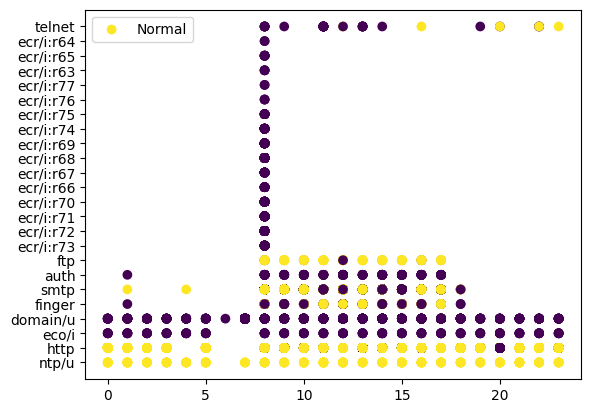

In [15]:
# plotting
plt.scatter(data_pred['Start-Time'],data_pp['Service'],c=data_pred['anomaly'])
# plt.xticks(np.arange(5, 21, step=5))
plt.legend(['Normal','Anomaly'])
plt.xlabel = "Source IP"
plt.ylabel = "Destination IP"
plt.plot()

LOCAL OUTLIER FACTOR
-
- Used this model as a comparison with iForest's performance
- As a standard, k=20 was used. Referring to sklearn, 20 seems to provide good results, generally, without the use of GridSearch

LOF - Training

In [16]:
from sklearn import neighbors
anomaly_inputs = ['Service', 'Source-IP', 'Distination-IP']

model_lof = neighbors.LocalOutlierFactor(n_neighbors=20, novelty=True)
model_lof.fit(X[anomaly_inputs])

LocalOutlierFactor(novelty=True)

LOF - Testing

In [17]:
predictions = model_lof.predict(X[anomaly_inputs])
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1,  1,  1, ...,  1,  1, -1])

[]

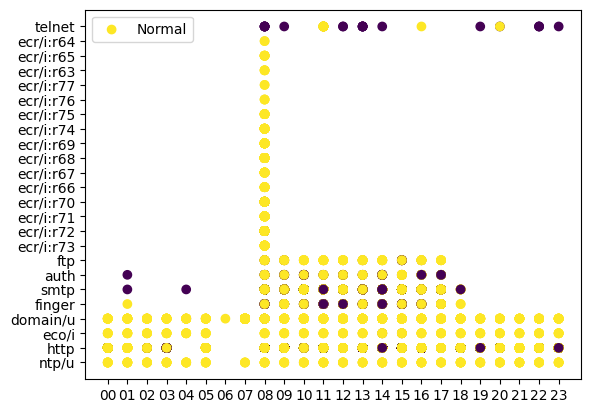

In [18]:
plt.scatter(X['Start-Time'],data_pp['Service'],c=predictions)
# plt.xticks(np.arange(5, 21, step=5))
plt.legend(['Normal','Anomaly'])
plt.xlabel = "Source IP"
plt.ylabel = "Destination IP"
plt.plot()